In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel("population_total.xlsx")
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [19]:
df.columns

Index(['country',      1800,      1801,      1802,      1803,      1804,
            1805,      1806,      1807,      1808,
       ...
            2091,      2092,      2093,      2094,      2095,      2096,
            2097,      2098,      2099,      2100],
      dtype='object', length=302)

In [20]:
df = df.melt(id_vars = 'country',var_name = 'Year',value_name = 'total_population')
df

,country,Year,total_population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           59297 non-null  object
 1   Year              59297 non-null  object
 2   total_population  59297 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [53]:
df['Year'] = pd.to_datetime(df['Year'],format = '%Y',errors = 'coerce')
df.dtypes

country                     object
Year                datetime64[ns]
total_population           float64
dtype: object

In [23]:
val_population = list(df.total_population.values)
val_population

['3.28M',
 '1.57M',
 '400k',
 2650,
 '40.2k',
 '534k',
 '413k',
 '37k',
 '200k',
 '3M',
 '880k',
 '899k',
 '3.25M',
 '637k',
 '1.67M',
 '19.2M',
 '2.25M',
 '64.5k',
 '27.4k',
 '852k',
 '2.36M',
 '25.5k',
 '887k',
 '2.5M',
 '81.7k',
 2260,
 '392k',
 '121k',
 '479k',
 '500k',
 '1.75M',
 '771k',
 '330M',
 '1.09M',
 '1.86M',
 '5.16M',
 '314k',
 '1.21M',
 '56.3k',
 '55.7k',
 '53k',
 '272k',
 '184k',
 '5.52M',
 '18M',
 '22.8k',
 '19.9k',
 '1M',
 '150k',
 '2.5M',
 '500k',
 '3.5M',
 '205k',
 '11.5M',
 '334k',
 '12M',
 '800k',
 '131k',
 '29M',
 '16.4k',
 '158k',
 '10.8M',
 '1.07M',
 '2.02M',
 '984k',
 '103k',
 '218k',
 '80.4k',
 '2.25M',
 '29.4k',
 '463k',
 '166k',
 '20k',
 '130k',
 905,
 '1.23M',
 '500k',
 '3.25M',
 '16.1M',
 '201M',
 '5.25M',
 '6M',
 '1M',
 '61.4k',
 '210k',
 '19M',
 '300k',
 '200k',
 '28M',
 '2.04M',
 '2.57M',
 '530k',
 '2.09M',
 '17.9k',
 '17.2k',
 '9.39M',
 '81.3k',
 '470k',
 '300k',
 '314k',
 '230k',
 '24k',
 5800,
 '1.75M',
 '276k',
 '779k',
 '127k',
 '591k',
 '2.5M',
 7

In [27]:
df['total_population'] = df['total_population'].replace({'k':'e3',"M":'e6',"B":'e9'},regex = True)
df['total_population']

0        3.28e6
1        1.57e6
2         400e3
3          2650
4        40.2e3
          ...  
59292     310e3
59293    53.2e6
59294    79.2e6
59295    81.5e6
59296      31e6
Name: total_population, Length: 59297, dtype: object

In [28]:
val_population_m = list(df.total_population.values)
val_population_m

['3.28e6',
 '1.57e6',
 '400e3',
 2650,
 '40.2e3',
 '534e3',
 '413e3',
 '37e3',
 '200e3',
 '3e6',
 '880e3',
 '899e3',
 '3.25e6',
 '637e3',
 '1.67e6',
 '19.2e6',
 '2.25e6',
 '64.5e3',
 '27.4e3',
 '852e3',
 '2.36e6',
 '25.5e3',
 '887e3',
 '2.5e6',
 '81.7e3',
 2260,
 '392e3',
 '121e3',
 '479e3',
 '500e3',
 '1.75e6',
 '771e3',
 '330e6',
 '1.09e6',
 '1.86e6',
 '5.16e6',
 '314e3',
 '1.21e6',
 '56.3e3',
 '55.7e3',
 '53e3',
 '272e3',
 '184e3',
 '5.52e6',
 '18e6',
 '22.8e3',
 '19.9e3',
 '1e6',
 '150e3',
 '2.5e6',
 '500e3',
 '3.5e6',
 '205e3',
 '11.5e6',
 '334e3',
 '12e6',
 '800e3',
 '131e3',
 '29e6',
 '16.4e3',
 '158e3',
 '10.8e6',
 '1.07e6',
 '2.02e6',
 '984e3',
 '103e3',
 '218e3',
 '80.4e3',
 '2.25e6',
 '29.4e3',
 '463e3',
 '166e3',
 '20e3',
 '130e3',
 905,
 '1.23e6',
 '500e3',
 '3.25e6',
 '16.1e6',
 '201e6',
 '5.25e6',
 '6e6',
 '1e6',
 '61.4e3',
 '210e3',
 '19e6',
 '300e3',
 '200e3',
 '28e6',
 '2.04e6',
 '2.57e6',
 '530e3',
 '2.09e6',
 '17.9e3',
 '17.2e3',
 '9.39e6',
 '81.3e3',
 '470e3',
 '30

In [29]:
df['total_population'] = df['total_population'].astype(float)
print(df.dtypes)

country                     object
Year                datetime64[ns]
total_population           float64
dtype: object


(0.0, 1500.0)

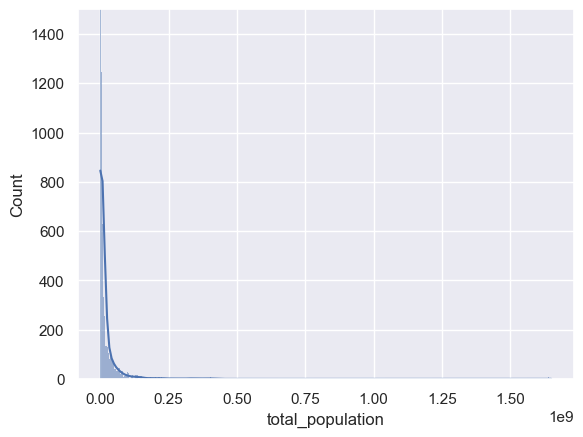

In [40]:
sns.set_theme(style="darkgrid")
pop_hist = sns.histplot(data=df, x="total_population", kde=True)
#pop_hist.set_xlim(0,df['total_population'].max())
pop_hist.set_ylim(0,1500)


#### the population distribution is right skewed

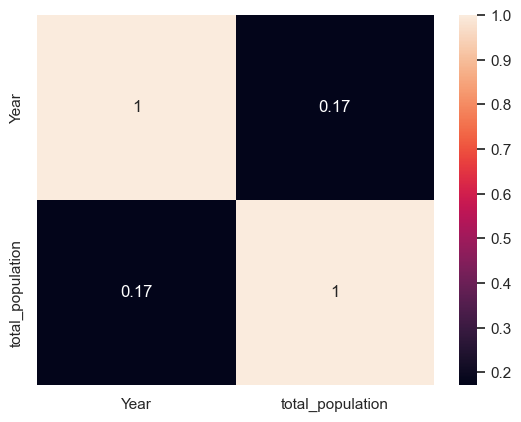

In [50]:
numeric_cols = df.select_dtypes(exclude=['object'])
sns.heatmap(numeric_cols.corr(), annot=True);

#### There is a positive relation between the year and the total_population

<Axes: xlabel='Year', ylabel='total_population'>

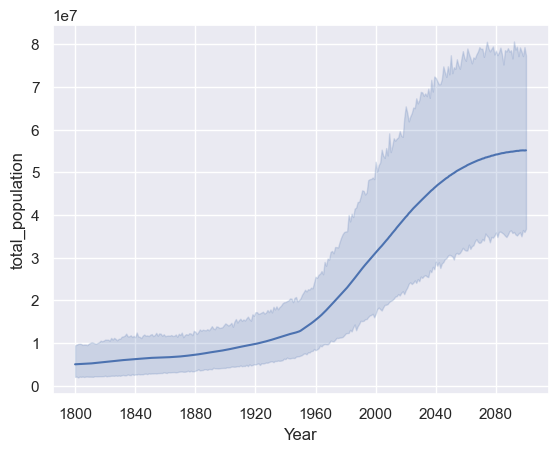

In [55]:
sns.lineplot(data=df,x='Year', y='total_population')

#### after nearly 1950 the population increased rapedly and this could be due to many reasons ,one could be the develpoment the health care sector

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.country)

numerical_column = le.transform(df.country)
df['country'] = numerical_column
df

,country,Year,total_population
0,0,1800-01-01,3280000.0
1,4,1800-01-01,1570000.0
2,1,1800-01-01,400000.0
3,3,1800-01-01,2650.0
4,186,1800-01-01,40200.0
...,...,...,...
59292,146,2100-01-01,310000.0
59293,194,2100-01-01,53200000.0
59294,159,2100-01-01,79200000.0
59295,195,2100-01-01,81500000.0


In [70]:
len(le.inverse_transform(labels)) # all names of countries is written in only one way --> means there is a cosistency in the data 

197

In [71]:
labels = list(df.country.unique())
print(labels)

le.inverse_transform(labels)


[0, 4, 1, 3, 186, 6, 7, 5, 8, 9, 10, 27, 16, 18, 26, 13, 25, 12, 11, 21, 15, 17, 20, 23, 14, 24, 19, 22, 32, 30, 170, 34, 35, 41, 29, 38, 39, 36, 37, 31, 40, 43, 44, 45, 64, 47, 48, 46, 49, 2, 50, 51, 54, 162, 55, 57, 59, 58, 60, 112, 61, 187, 63, 65, 69, 62, 70, 53, 66, 67, 68, 71, 75, 74, 73, 42, 72, 76, 79, 78, 82, 80, 81, 77, 83, 84, 85, 87, 86, 88, 89, 92, 28, 90, 164, 160, 91, 93, 95, 97, 98, 165, 99, 163, 96, 100, 101, 94, 117, 114, 113, 102, 105, 111, 108, 129, 106, 107, 119, 116, 115, 118, 109, 110, 103, 104, 120, 126, 127, 125, 123, 130, 122, 121, 124, 131, 132, 135, 138, 139, 133, 136, 140, 128, 141, 137, 134, 142, 143, 144, 145, 149, 167, 150, 154, 157, 153, 52, 147, 158, 151, 161, 148, 168, 155, 156, 169, 56, 152, 171, 33, 177, 175, 173, 182, 176, 178, 179, 180, 181, 183, 172, 174, 184, 185, 189, 188, 190, 166, 192, 193, 191, 146, 194, 159, 195, 196]


array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',